# Exam 2

In [12]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import sympy as sp
from scipy import integrate as integrate
import MyFunc
import scipy.integrate as integrate

# Part A

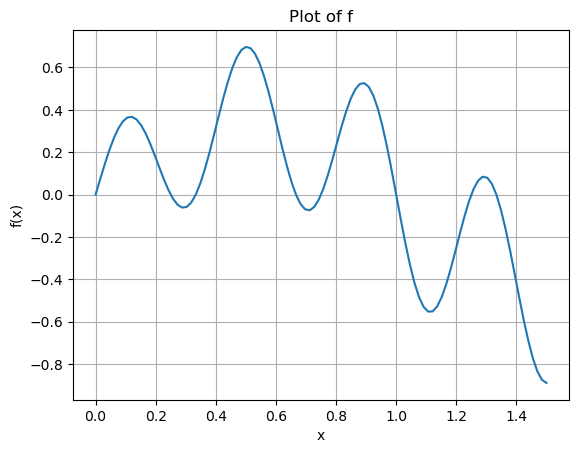

In [2]:
# create function for function
x = sp.symbols('x')
def f(x): return (1-.5*np.exp(-x))*np.sin(3*np.pi*x)*np.cos(2*np.pi*x)

# set up range of vals
xs = np.linspace(0, 1.5, 100)

F = f(xs)

# plot function
plt.plot(xs, f(xs))
plt.xlabel("x")
plt.grid()
plt.ylabel("f(x)")
plt.title("Plot of f")
plt.show()

# Part B

In [15]:
# Compute
x1,x2 = MyFunc.rootsearch(f, 0.01, 1.5, 0.01)

rt1 = MyFunc.bisection(f,x1,x2,switch=1,tol=1.0e-9)

# Print first positive root
print("The first positive (nonzero) root of the function:", rt1)

The first positive (nonzero) root of the function: 0.24999999970197684


# Part C

In [4]:
def central_difference(f,m,dm,order):
    # Create array of zeros
    df = np.zeros(len(m))
    if order == 1: # choose equation for first derivative
        for i in range(len(m)):
            df[i] = (f(m[i]+dm) - f(m[i]-dm)) / (2*dm)
    elif order == 2: # choose equation for second derivative
        for i in range(len(m)):
            df[i] = (f(m[i]+dm) - 2*f(m[i]) + f(m[i]-dm)) / (dm**2)
    return df

In [5]:
# set up list of xs to test
xss = np.arange(0, 2.5, 0.5)

delta_x = 10**-7

dF = central_difference(f,xss,delta_x,1)

# loop and print
for i in range(len(xss)):
    print("The derivative of f(x) at {0:.1f} = {1:.6f}".format(xss[i], dF[i]))

print("\nThe delta x that I used was", delta_x)

The derivative of f(x) at 0.0 = 4.712389
The derivative of f(x) at 0.5 = 0.303265
The derivative of f(x) at 1.0 = -7.691187
The derivative of f(x) at 1.5 = -0.111565
The derivative of f(x) at 2.0 = 8.787025

The delta x that I used was 1e-07


In [24]:
# Find derivative using Symbolab
def df(x): 
    return .5*np.exp(-x)*np.sin(3.0*np.pi*x)*np.cos(2.0*np.pi*x) + 3.0*np.pi*np.cos(3.0*np.pi*x)*np.cos(2.0*np.pi*x) - (3.0*np.pi/2)*np.exp(-x)*np.cos(3.0*np.pi*x)*np.cos(2.0*np.pi*x) - 2.0*np.pi*np.sin(2.0*np.pi*x)*np.sin(3.0*np.pi*x) + np.pi*np.exp(-x)*np.sin(2.0*np.pi*x)*np.sin(3.0*np.pi*x)

dF2 = df(xss)

for i in range(len(xss)):
        print("The absolute total error for the approximate derivate at {0:.1f}: {1}".format(xss[i], np.abs(dF[i]-dF2[i])))
    

The absolute total error for the approximate derivate at 0.0: 1.652011860642233e-12
The absolute total error for the approximate derivate at 0.5: 3.409065252313326e-10
The absolute total error for the approximate derivate at 1.0: 1.4160290717768476e-09
The absolute total error for the approximate derivate at 1.5: 1.2208539734714918e-10
The absolute total error for the approximate derivate at 2.0: 6.662984830541063e-09


# Part D

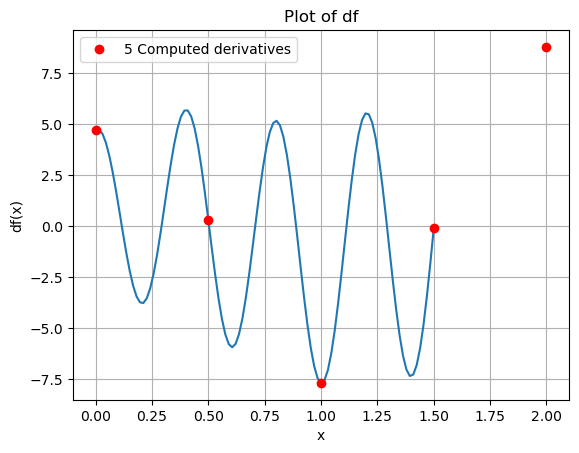

In [10]:
# plot function
plt.plot(xs, df(xs))
plt.plot(xss,df(xss), "ro", label = "5 Computed derivatives")
plt.xlabel("x")
plt.grid()
plt.ylabel("df(x)")
plt.title("Plot of df")
plt.legend()
plt.show()

# Part E

In [20]:
integral = integrate.quad(f, 0, rt1)

print("The integral of the function from x = 0 to its first positive root is:\n{0}".format(integral[0]))

The integral of the function from x = 0 to its first positive root is:
0.056018940490097376
